In [1]:
import pandas as pd
import numpy as np
import keras
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
%cd /content/drive/My Drive/HW2_deep/

Mounted at /content/drive
/content/drive/My Drive/HW2_deep


# **PART 1**




In [2]:
df = pd.read_csv("data.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


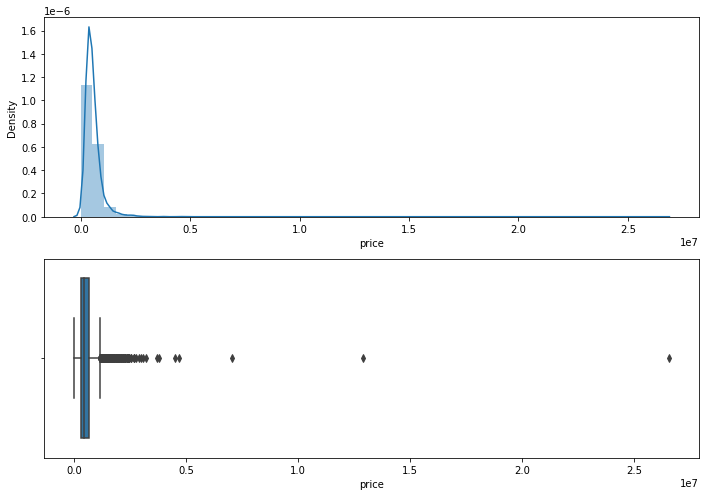

In [3]:
# plot distribution of data
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [4]:
# remove outliers
df=df[df["price"]<=10000000]

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
# date column to year/month/day
print(df.shape)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df['day']=df['date'].apply(lambda date:date.day)
y = df.price
X = df.drop(columns=["price"], axis=1)

(4598, 18)


In [7]:
df=df.drop("date",axis=1)

In [8]:
cat_cols=["street", "city","statezip","country"]
X_categorical_df = pd.get_dummies(X[cat_cols], columns=cat_cols)

In [10]:
y = df.price
X = df.drop(columns=["price"], axis=1)
num_cols=list(df.columns.values)
num_cols=list(set(num_cols)-set(cat_cols))
num_cols.remove("price")
print(num_cols)
X_final = X[num_cols]
X_final = X_final.join(X_categorical_df)

['sqft_above', 'day', 'month', 'condition', 'year', 'sqft_basement', 'yr_built', 'bathrooms', 'yr_renovated', 'sqft_living', 'floors', 'bedrooms', 'waterfront', 'view', 'sqft_lot']


In [11]:
from sklearn import preprocessing
X_final[num_cols] = preprocessing.StandardScaler().fit_transform(X_final[num_cols])
#X_final[num_cols] = MinMaxScaler().fit_transform(X_final[num_cols])

In [12]:
X_final.head()

,sqft_above,day,month,condition,year,sqft_basement,yr_built,bathrooms,yr_renovated,sqft_living,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,-0.565375,-1.474434,-1.107676,-0.667016,0.0,-0.672380,-0.530895,-0.842992,1.221778,-0.830086,...,0,0,0,0,0,0,0,0,0,1
1,1.789067,-1.474434,-1.107676,2.286224,0.0,-0.069113,-1.674420,0.432768,-0.825623,1.568152,...,0,0,0,0,0,0,0,0,0,1
2,0.118921,-1.474434,-1.107676,0.809604,0.0,-0.672380,-0.160931,-0.205112,-0.825623,-0.217549,...,0,0,0,0,0,0,0,0,0,1
3,-0.959715,-1.474434,-1.107676,0.809604,0.0,1.482144,-0.261830,0.113828,-0.825623,-0.144875,...,0,0,0,0,0,0,0,0,0,1
4,-0.797340,-1.474434,-1.107676,0.809604,0.0,1.051239,0.175400,0.432768,1.208503,-0.207167,...,0,0,0,0,0,0,0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,y_val.shape, X_val.shape

((3126, 4660), (920, 4660), (3126,), (920,), (552,), (552, 4660))

In [20]:
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.optimizers import Adam

In [45]:
# define our model
model = models.Sequential()
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
#model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='Adam',loss='mse')
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=200)
model.summary()
loss_df = pd.DataFrame(model.history.history)


Epoch 1/200
25/25 [==============================] - 1s 16ms/step - loss: 436321779712.0000 - val_loss: 416942227456.0000
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 436313489408.0000 - val_loss: 416924270592.0000
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 436260929536.0000 - val_loss: 416831209472.0000
Epoch 4/200
25/25 [==============================] - 0s 7ms/step - loss: 436060717056.0000 - val_loss: 416517226496.0000
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 435460472832.0000 - val_loss: 415688753152.0000
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 434034442240.0000 - val_loss: 413902733312.0000
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 431279046656.0000 - val_loss: 410548469760.0000
Epoch 8/200
25/25 [==============================] - 0s 7ms/step - loss: 426124574720.0000 - val_loss: 404921024512.0000
Epoch 9/200
25/25 [============

MAE: 111220.87508445056
MSE: 30558084225.071476
RMSE: 174808.70752073958
VarScore: 0.7703664574856248


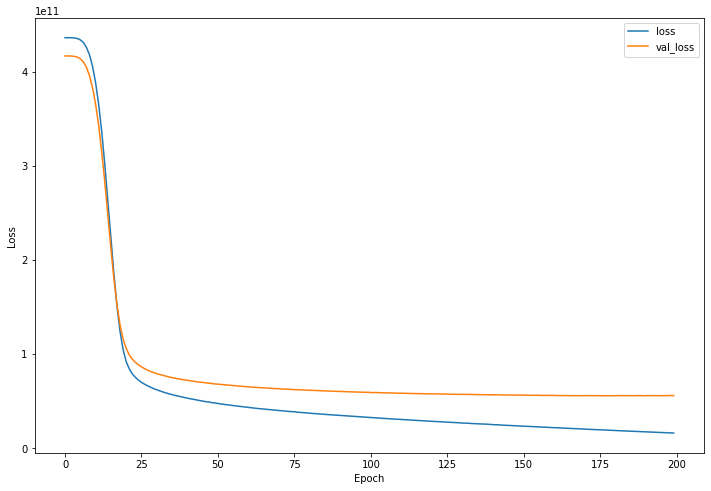

In [46]:
loss_df.plot(figsize=(12,8))
plt.xlabel("Epoch")
plt.ylabel("Loss")
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))# Visualizing Our predictions

#PART 2

In [44]:
model = models.Sequential()
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
#model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=["mse","mae"])
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=200)
model.summary()
loss_df = pd.DataFrame(model.history.history)

Epoch 1/200
25/25 [==============================] - 1s 28ms/step - loss: 436321812480.0000 - mse: 436321812480.0000 - mae: 543939.6250 - val_loss: 416942522368.0000 - val_mse: 416942522368.0000 - val_mae: 533815.7500
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 436314898432.0000 - mse: 436314898432.0000 - mae: 543934.5000 - val_loss: 416926597120.0000 - val_mse: 416926597120.0000 - val_mae: 533803.3125
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 436268400640.0000 - mse: 436268400640.0000 - mae: 543900.9375 - val_loss: 416839696384.0000 - val_mse: 416839696384.0000 - val_mae: 533737.0000
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 436071628800.0000 - mse: 436071628800.0000 - mae: 543761.1875 - val_loss: 416531447808.0000 - val_mse: 416531447808.0000 - val_mae: 533503.0000
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 435495141376.0000 - mse: 435495141376.0000 - mae: 543347.1

MAE: 116901.30270148996
MSE: 32448035841.150127
RMSE: 180133.38347222074
VarScore: 0.7584857883429089


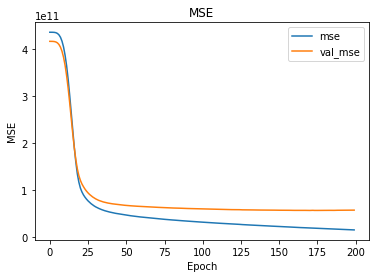

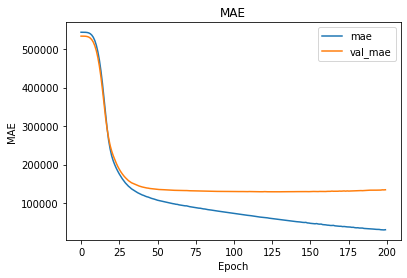

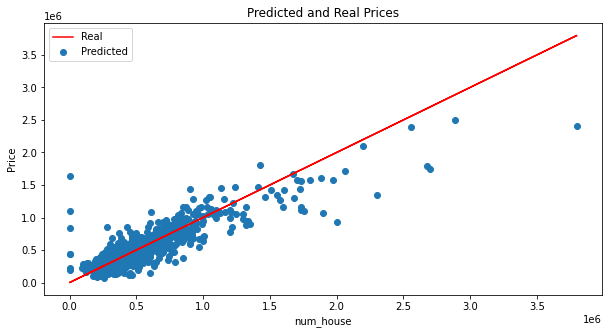

In [43]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))# Visualizing Our predictions
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.title('Predicted and Real Prices')
plt.xlabel('num_house')
plt.ylabel('Price')
plt.legend(["Real","Predicted"])


# PART 3

In [47]:
model = models.Sequential()
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
#model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='Adam',loss='mae',metrics=["mse","mae"])
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=200)
model.summary()
loss_df = pd.DataFrame(model.history.history)

Epoch 1/200
25/25 [==============================] - 2s 30ms/step - loss: 543939.5625 - mse: 436321615872.0000 - mae: 543939.5625 - val_loss: 533815.1250 - val_mse: 416941998080.0000 - val_mae: 533815.1250
Epoch 2/200
25/25 [==============================] - 0s 13ms/step - loss: 543931.9375 - mse: 436312604672.0000 - mae: 543931.9375 - val_loss: 533796.6875 - val_mse: 416920928256.0000 - val_mae: 533796.6875
Epoch 3/200
25/25 [==============================] - 0s 13ms/step - loss: 543883.8125 - mse: 436255064064.0000 - mae: 543883.8125 - val_loss: 533698.9375 - val_mse: 416810008576.0000 - val_mae: 533698.9375
Epoch 4/200
25/25 [==============================] - 0s 18ms/step - loss: 543688.7500 - mse: 436021100544.0000 - mae: 543688.7500 - val_loss: 533366.6250 - val_mse: 416433831936.0000 - val_mae: 533366.6250
Epoch 5/200
25/25 [==============================] - 0s 16ms/step - loss: 543125.3125 - mse: 435348439040.0000 - mae: 543125.3125 - val_loss: 532522.5625 - val_mse: 41548077465

MAE: 97560.6018288299
MSE: 31378287907.589947
RMSE: 177139.17665945596
VarScore: 0.7658932304120495


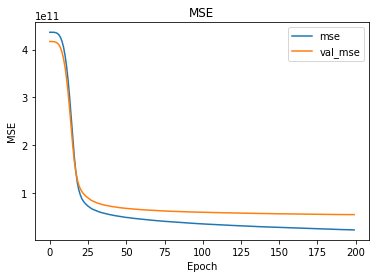

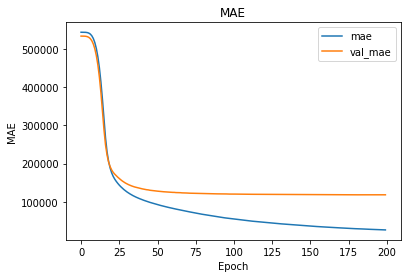

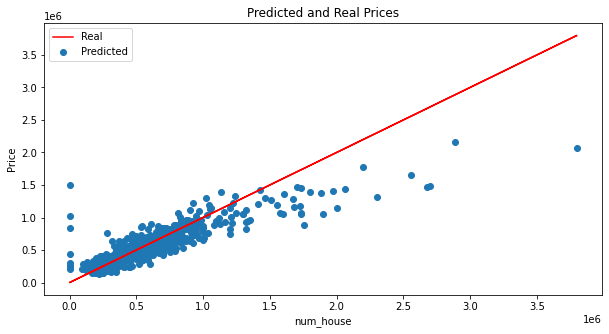

In [48]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))# Visualizing Our predictions
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.title('Predicted and Real Prices')
plt.xlabel('num_house')
plt.ylabel('Price')
plt.legend(["Real","Predicted"])

# BONUS

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)


Ridge()

In [50]:
y_pred_ridge=clf.predict(X_test)
y_pred_reg=reg.predict(X_test)

In [51]:
sc=clf.score(X_test, y_test, sample_weight=None)

In [52]:
from sklearn import metrics
print('Ridge MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Ridge MSE:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('Ridge VarScore:',metrics.explained_variance_score(y_test,y_pred_ridge))# Visualizing Our predictions
print('\nLinear Regression MAE:', metrics.mean_absolute_error(y_test, y_pred_reg))  
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, y_pred_reg))  
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))
print('Linear Regression VarScore:',metrics.explained_variance_score(y_test,y_pred_reg))# Visualizing Our predictions

Ridge MAE: 103140.33366868865
Ridge MSE: 29720926931.508945
Ridge RMSE: 172397.58389115825
Ridge VarScore: 0.7710464984575975

Linear Regression MAE: 794691607220.3866
Linear Regression MSE: 9.502264494466243e+24
Linear Regression RMSE: 3082574329106.4766
Linear Regression VarScore: -73197704121424.52
